In [4]:
# Dogs vs cats Kaggle competition in 2013
# Best entrants achieved 95% accuracy
# We will train on less than 10% of the data
# 25000 images of dogs and cats (12500 from each class)
# Create new dataset containing three subsets: 1000 for each class, validation set of 500 of each class, and test set of 500 of each class

import os, shutil

original_dataset_dir = "/Users/timhou/Documents/kaggle/dogs_cats/train/"
base_dir = "/Users/timhou/Documents/kaggle/dogs_cats/train_sample/"
# os.mkdir(base_dir)

# # Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# # Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# # Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# # Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# # Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# # Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# # Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# # Copies the first 1,000 cat images to train_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# # Copies the next 500 cat images to validation_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
  
# # Copies the next 500 cat images to test_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

# # Copies the first 1,000 dog images to train_dogs_dir   
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# # Copies the next 500 dog images to validation_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# # Copies the next 500 dog images to test_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [2]:
# 2000 training images
# 1000 validation images
# 1000 test images
print('total training cat images: {}'.format(len(os.listdir(train_cats_dir))))
print('total training dog images: {}'.format(len(os.listdir(train_dogs_dir)))) 
print('total validation cat images: {}'.format(len(os.listdir(validation_cats_dir))))
print('total validation dog images: {}'.format(len(os.listdir(validation_dogs_dir))))
print('total test cat images: {}'.format(len(os.listdir(test_cats_dir))))
print('total test dog images: {}'.format(len(os.listdir(test_dogs_dir))))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [1]:
# Building your network:
# Convnet with stack of alternated Conv2D with relu activation and MaxPooling2D layers
# Add one more Conv2D + MaxPooling2D than the MNIST model to augment capacity and reduce size of feature maps so they aren't overly large when you reach the Flatten layer (150x150 -> 7x7 just before Flatten layer)

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/Users/timhou/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GT 750M (0000:01:00.0)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [2]:
# configuring the model for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
# Data preprocessing - reformat data into floating-point tensors
# Steps:
# 1. Read the picture files
# 2. Decode the JPEG content to RGB grids of pixels
# 3. Convert these into floating-point tensors
# 4. Rescale the pixel values (between 0 and 255) to the [0,1] interval (neural nets prefer small input values)
# Keras has utilities to take care of these steps automatically (keras.preprocessing.image.ImageDataGenerator) - sets up Python generators that can automatically turn image files on disk into batches of preprocessed tensors
# Using ImageDataGenerator to read images from directories:
from keras.preprocessing.image import ImageDataGenerator

# rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train_dir = target directory
# target_size = resizes all images to 150x150
# class_mode = using binary_crossentropy loss, need binary labels
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# One of these generators yields batches of 150x150 RGB images (shape (20,150,150,3)) and binary labels (shape (20,))
# There are 20 samples in each batch (batch size)
# The generator yields these batches indefinitely (it loops endlessly over the images in the target folder, so we need to break the iteration loop at some point)
for data_batch, labels_batch in train_generator:
    print "data batch shape: {}".format(data_batch.shape)
    print "labels batch shape: {}".format(labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
# fit_generator method is used to fit the model to the data via generator
# since data is generated endleslly, the model needs to know how many samples to draw from the generator before declaring an epoch over (steps_per_epoch)
# after having drawn steps_per_epoch batches from the generator (after running steps_per_epoch gradient descent steps), the fitting process will go to the next epoch
# in this case, batches are 20 samples, so it will take 100 batches until you see the target of 2000 samples
# fitting the model using a batch generator:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 75s 747ms/step - loss: 0.6944 - acc: 0.5320 - val_loss: 0.6833 - val_acc: 0.5810
Epoch 2/30
100/100 [==============================] - 74s 743ms/step - loss: 0.6651 - acc: 0.6035 - val_loss: 0.6542 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 74s 742ms/step - loss: 0.6241 - acc: 0.6605 - val_loss: 0.6372 - val_acc: 0.6160
Epoch 4/30
100/100 [==============================] - 74s 742ms/step - loss: 0.5816 - acc: 0.6925 - val_loss: 0.5993 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 74s 742ms/step - loss: 0.5351 - acc: 0.7340 - val_loss: 0.6104 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 74s 742ms/step - loss: 0.5027 - acc: 0.7510 - val_loss: 0.5815 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 74s 744ms/step - loss: 0.4723 - acc: 0.7715 - val_loss: 0.5974 - val_acc: 0.6740
Epoch 8/30
100/100 [==============================] - 7

In [12]:
# saving the model
model.save("cats_and_dogs_small_1.h5")

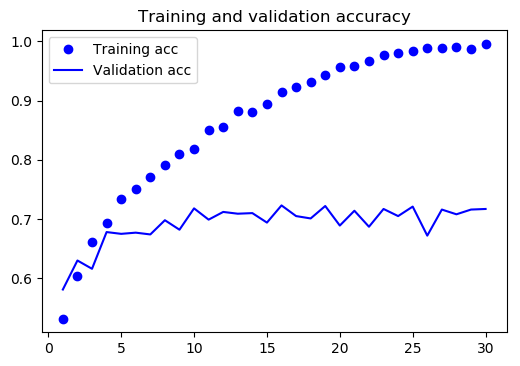

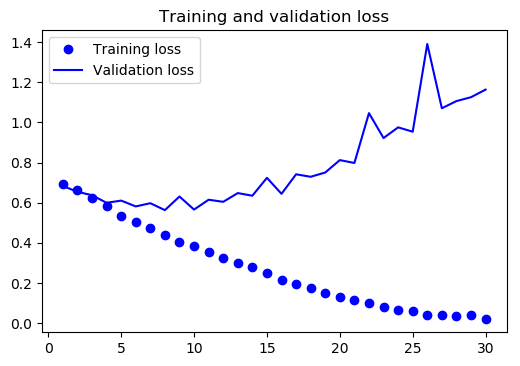

In [14]:
# displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [6]:
# these plots are characteristic of overfitting
# the training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70-72%
# the validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0
# since we have few training samples (2000), overfitting is the main concern
# can try dropout / weight decay (L2 regularization) to mitigate overfitting, but better to use data augmentation for processing images with deep learning models
# setting up a data augmentation configuration vis ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [16]:
# rotation_range is a value in degrees (0–180), a range within which to ran- domly rotate pictures.
# width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
# shear_range is for randomly applying shearing transformations.
# zoom_range is for randomly zooming inside pictures.
# horizontal_flip is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
# fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

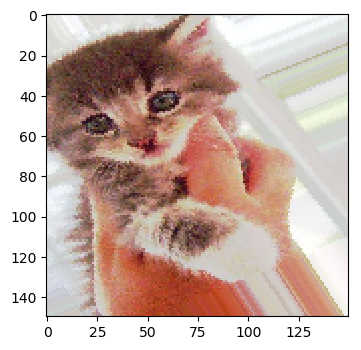

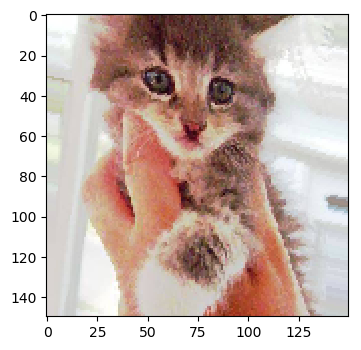

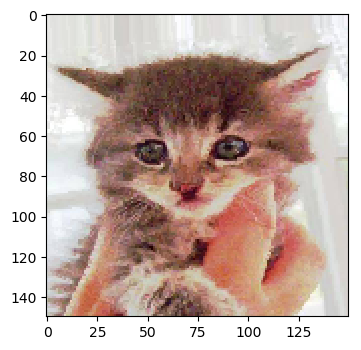

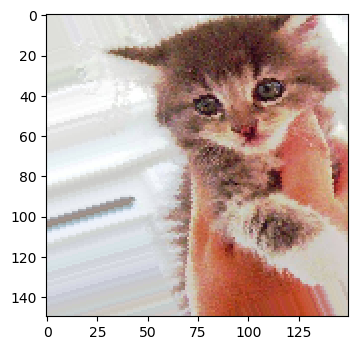

In [17]:
# displaying some randomly augmented training images
# Module with image-preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Chooses one image to augment
img_path = fnames[3]  

# Reads the image and resizes it
img = image.load_img(img_path, target_size=(150, 150))

# Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape) 

# Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [7]:
# define a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [8]:
# train covnet using data-augmentation generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

# Note that the validation data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 120s 1s/step - loss: 0.6928 - acc: 0.5266 - val_loss: 0.6854 - val_acc: 0.5044
Epoch 2/100
100/100 [==============================] - 121s 1s/step - loss: 0.6840 - acc: 0.5469 - val_loss: 0.6641 - val_acc: 0.6250
Epoch 3/100
100/100 [==============================] - 121s 1s/step - loss: 0.6690 - acc: 0.5916 - val_loss: 0.6457 - val_acc: 0.6377
Epoch 4/100
100/100 [==============================] - 123s 1s/step - loss: 0.6526 - acc: 0.6097 - val_loss: 0.6167 - val_acc: 0.6624
Epoch 5/100
100/100 [==============================] - 121s 1s/step - loss: 0.6453 - acc: 0.6272 - val_loss: 0.6109 - val_acc: 0.6555
Epoch 6/100
100/100 [==============================] - 122s 1s/step - loss: 0.6261 - acc: 0.6434 - val_loss: 0.6008 - val_acc: 0.6770
Epoch 7/100
100/100 [==============================] - 123s 1s/step - loss: 0.6050 - acc: 0.6675 - val_loss: 0.6

In [9]:
# saving the model
model.save('cats_and_dogs_small_2.h5')

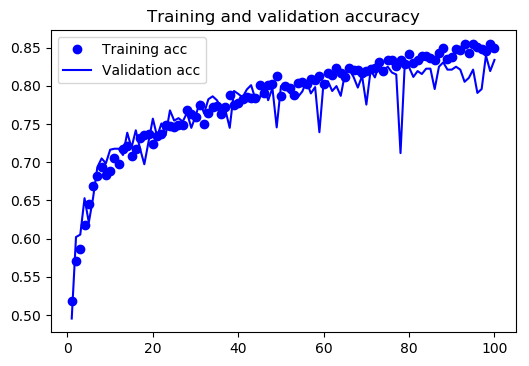

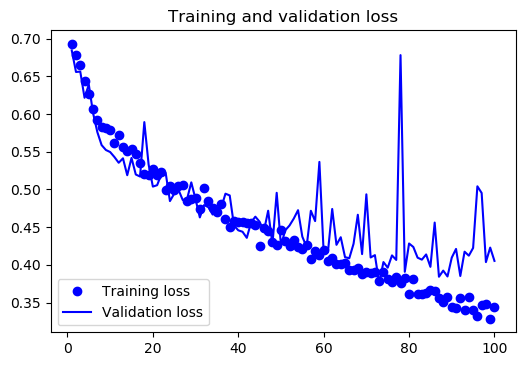

In [21]:
# plot new acc and loss scores using data aug and dropout
# thanks to data augmentation and dropout, the model is no longer overfitting
# the training curves are closely tracking the validation curves
# we now have accuracy of 82%, a 15% relative improvement over the non-regularized model
# by using regularization techniques even further, and by tuning the network's parameters (e.g. # of filters per convolution layer, # of layers in network), you may be able to get a better accuracy (86-87%)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [2]:
# To improve your accuracy on this problem, you'll have to use a pretrained model (VGG16)
# Instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights="imagenet",
                 include_top=False,
                 input_shape=(150,150,3))

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
# extracting features using pretrained convolutional base
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/Users/timhou/Documents/kaggle/dogs_cats/train_sample/"
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) 
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, 
                                            target_size=(150, 150), 
                                            batch_size=batch_size, 
                                            class_mode='binary')
    i=0
    # extract images as numpy arrays as well as their labels
    for inputs_batch, labels_batch in generator:
        # extract features from images by calling predict
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
        # Note that because generators yield data indefinitely in a loop, you must break after every image has been seen once.
            break 
    return features, labels

# extract feature shape: (samples, 4, 4, 512)
train_features, train_labels = extract_features(train_dir, 2000) 
validation_features, validation_labels = extract_features(validation_dir, 1000) 
test_features, test_labels = extract_features(test_dir, 1000)

# reshape/flatten for densely connected classifier (samples, 8192)
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# at this point, define the densely connected classifier (note the use of dropout for regularization) and train it on the data and labels from extracted features above
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))
# training should be very fast because we only have to deal with two Dense layers (an epoch takes less than one second even on CPU)

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 471us/step - loss: 0.5908 - acc: 0.6735 - val_loss: 0.4353 - val_acc: 0.8270
Epoch 2/30
2000/2000 [==============================] - 1s 339us/step - loss: 0.4147 - acc: 0.8170 - val_loss: 0.3571 - val_acc: 0.8730
Epoch 3/30
2000/2000 [==============================] - 1s 322us/step - loss: 0.3514 - acc: 0.8540 - val_loss: 0.3213 - val_acc: 0.8770
Epoch 4/30
2000/2000 [==============================] - 1s 323us/step - loss: 0.3119 - acc: 0.8695 - val_loss: 0.2981 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 1s 325us/step - loss: 0.2844 - acc: 0.8870 - val_loss: 0.2831 - val_acc: 0.8930
Epoch 6/30
2000/2000 [==============================] - 1s 367us/step - loss: 0.2638 - acc: 0.8910 - val_loss: 0.2816 - val_acc: 0.8930
Epoch 7/30
2000/2000 [==============================] - 1s 354us/step - loss: 0.2489 - acc: 0.9110 - val_loss: 0.2666 - val_acc: 0.8900


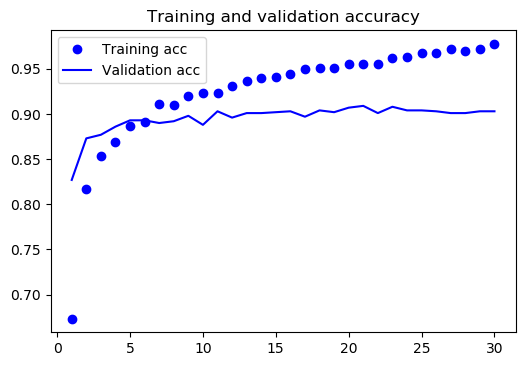

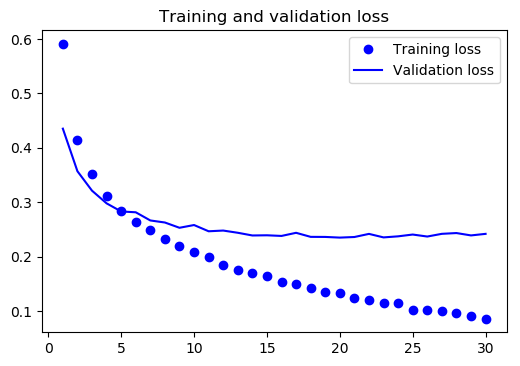

In [6]:
# Plot loss and accuracy curves on training and validation for simple feature extraction
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [7]:
# reach validation accuracy of about 90%
# however, the plots also indicate overfitting almost from the start despite using dropout with fairly large rate since there is no data augmentation

In [3]:
# feature extraction with data augmentation
from keras import models
from keras import layers

model = models.Sequential()
# models behave just like layers, so you can add a model like "conv_base" to Sequential model just like you would add a layer
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [4]:
# the convolutional base of VGG16 has 14.7 million parameters which is very large
# the classifier adding on top has 2 million parameters
# before compile and training model, it's very important to freeze the convolutional base
print("This is the number of trainable weights before freezing the conv base: {}".format(len(model.trainable_weights)))
conv_base.trainable = False
print("This is the number of trainable weights after freezing the conv base: {}".format(len(model.trainable_weights)))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [5]:
# import os
# from keras.preprocessing.image import ImageDataGenerator
# from keras import optimizers

# base_dir = "/Users/timhou/Documents/kaggle/dogs_cats/train_sample/"
# train_dir = os.path.join(base_dir, 'train') 
# validation_dir = os.path.join(base_dir, 'validation') 
# test_dir = os.path.join(base_dir, 'test')

# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest')

# # Note that the validation data shouldn’t be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     target_size=(150, 150),
#                                                     batch_size=20,
#                                                     class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(validation_dir,
#                                                         target_size=(150, 150),
#                                                         batch_size=20,
#                                                         class_mode='binary')

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=2e-5),
#               metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# with this setup, the two Dense layers (four weight tensors with main weight matrix and bias vector) will be trained
# Train the model end to end with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Note that the validation data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 201s 2s/step - loss: 0.5902 - acc: 0.6965 - val_loss: 0.4560 - val_acc: 0.8180
Epoch 2/30
100/100 [==============================] - 213s 2s/step - loss: 0.5051 - acc: 0.7670 - val_loss: 0.3893 - val_acc: 0.8490
Epoch 3/30
100/100 [==============================] - 212s 2s/step - loss: 0.4581 - acc: 0.7875 - val_loss: 0.3413 - val_acc: 0.8660
Epoch 4/30
100/100 [==============================] - 215s 2s/step - loss: 0.4249 - acc: 0.8110 - val_loss: 0.3257 - val_acc: 0.8650
Epoch 5/30
100/100 [==============================] - 219s 2s/step - loss: 0.3977 - acc: 0.8270 - val_loss: 0.2952 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 224s 2s/step - loss: 0.3903 - acc: 0.8305 - val_loss: 0.2927 - val_acc: 0.8850
Epoch 7/30
100/100 [==============================] - 224s 2s/step - loss: 0.3805 - acc: 0.8310 - val_loss: 0.2822 - v

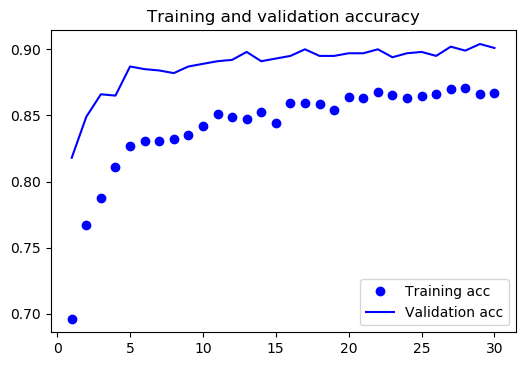

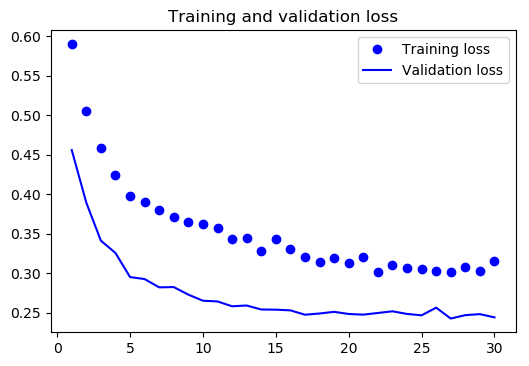

In [10]:
# plot training and validation accuracy/loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [4]:
# Fine tuning - it slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the problem at hand
# Reminder what the convolutional base looks like:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [6]:
# Fine-tune the last three convolutional layers, which means all layers up to `block4_pool` should be frozen, and the layers `block5_conv1`, `block5_conv2`, and `block5_conv3` should be trainable
# Freezing all layers up to a specific one
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    print layer.name, layer.trainable

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
# begin fine-tuning network with RMSProp optimizer using a very low learning rate
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 240s 2s/step - loss: 0.5449 - acc: 0.7255 - val_loss: 0.3438 - val_acc: 0.8560
Epoch 2/100
100/100 [==============================] - 269s 3s/step - loss: 0.3811 - acc: 0.8270 - val_loss: 0.2692 - val_acc: 0.8840
Epoch 3/100
100/100 [==============================] - 280s 3s/step - loss: 0.3318 - acc: 0.8505 - val_loss: 0.2287 - val_acc: 0.9030
Epoch 4/100
100/100 [==============================] - 284s 3s/step - loss: 0.2953 - acc: 0.8740 - val_loss: 0.2220 - val_acc: 0.9010
Epoch 5/100
100/100 [==============================] - 293s 3s/step - loss: 0.2741 - acc: 0.8900 - val_loss: 0.2039 - val_acc: 0.9140
Epoch 6/100
100/100 [==============================] - 303s 3s/step - loss: 0.2609 - acc: 0.8900 - val_loss: 0.1974 - val_acc: 0.9140
Epoch 7/100
100/100 [==============================] - 303s 3s/step - loss: 0.2484 - acc: 0.8965 - val_loss: 0.2051 - val_acc: 0.9150
Epoch 8/100
100/100 [==============================] - 303s 3s

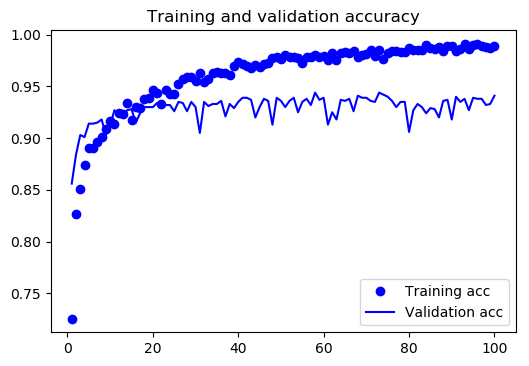

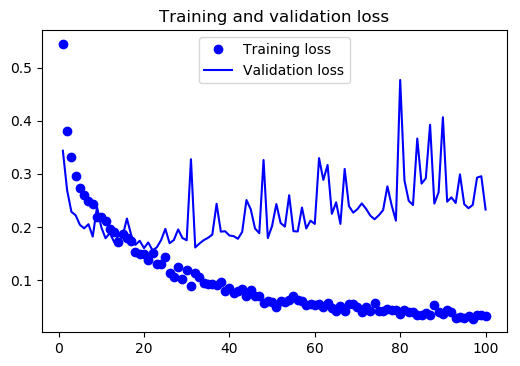

In [8]:
# plot training and validation accuracy/loss
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

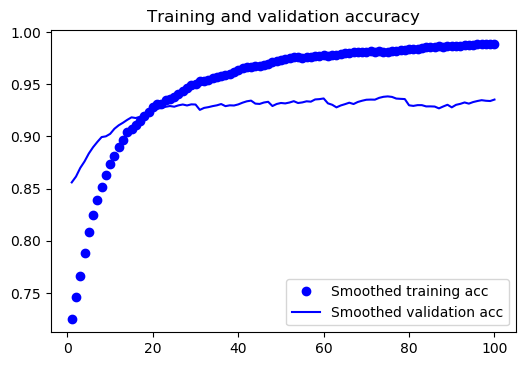

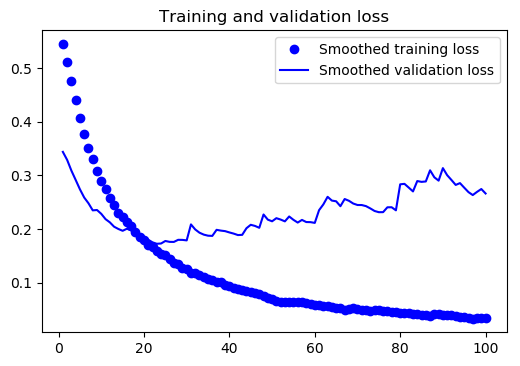

In [9]:
# Smoothing the plots
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
        
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
# should be seeing validation accuracy about 96-97%

In [10]:
# saving the model
model.save("cats_and_dogs_small_3.h5")

In [11]:
# Evaluate model on test data
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc: {}'.format(test_acc))
print('test loss: {}'.format(test_loss))
# Supposed to get test accuracy of 97% (one of the top results in Kaggle) on 10% of data
# Big difference between being able to train on 20,000 samples vs 2,000 samples

Found 1000 images belonging to 2 classes.
test acc: 0.931999994516
test loss: 0.291113431665


In [10]:
# Visualizing intermediate activations
# Loading old model 2
from keras.models import load_model
model = load_model("cats_and_dogs_small_2.h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
# preprocessing a single image
img_path = "/Users/timhou/Documents/kaggle/dogs_cats/train_sample/test/cats/cat.1700.jpg"

# preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print("shape: {}".format(img_tensor.shape))

shape: (1, 150, 150, 3)


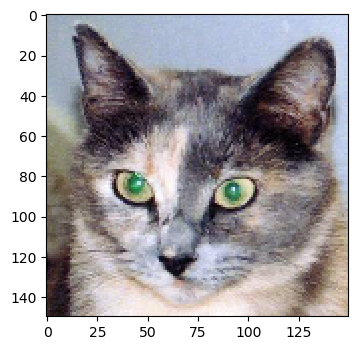

In [12]:
# displaying the test picture
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img_tensor[0])

In [13]:
# Instantiating a model from an input tensor and a list of output tensors
from keras import models

# extract the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [15]:
# Running the model in predict mode
# returns a list of five Numpy arrays (one array per layer activation)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print("shape: {}".format(first_layer_activation.shape))
# activation of the first convolution layer for cat image input
# 148 x 148 feature map with 32 channels

shape: (1, 148, 148, 32)


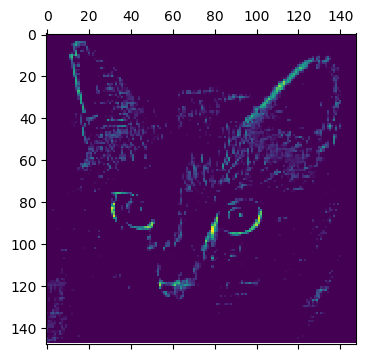

In [16]:
# Visualizing the fourth channel (32 channels total) of the activation of the first layer
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
# this channel appears to encode diagonal edge detector

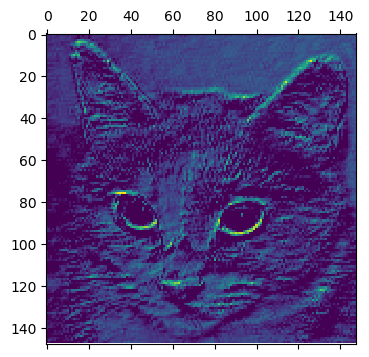

In [38]:
# Visualizing the seventh channel
# should be encoding the cat eyes
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

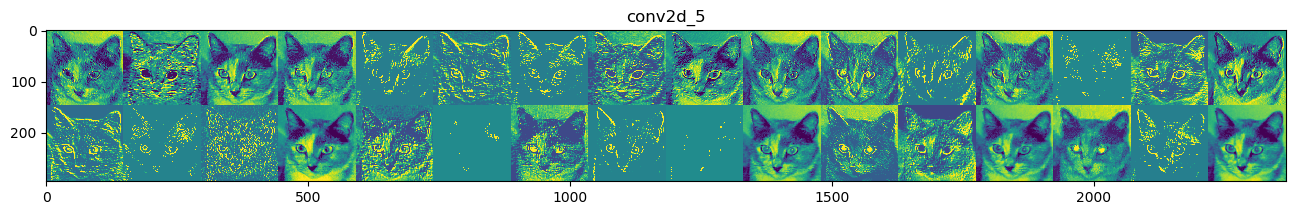

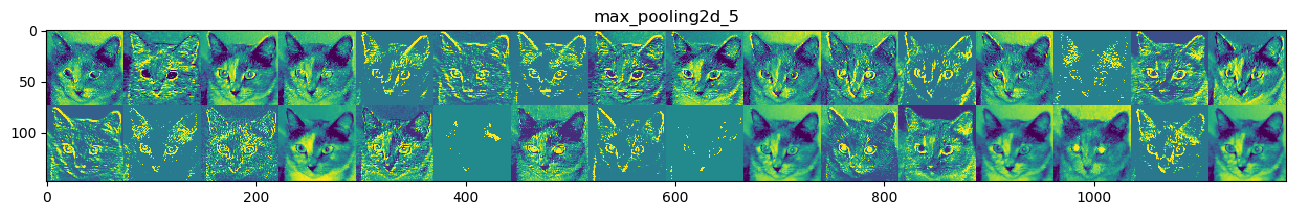

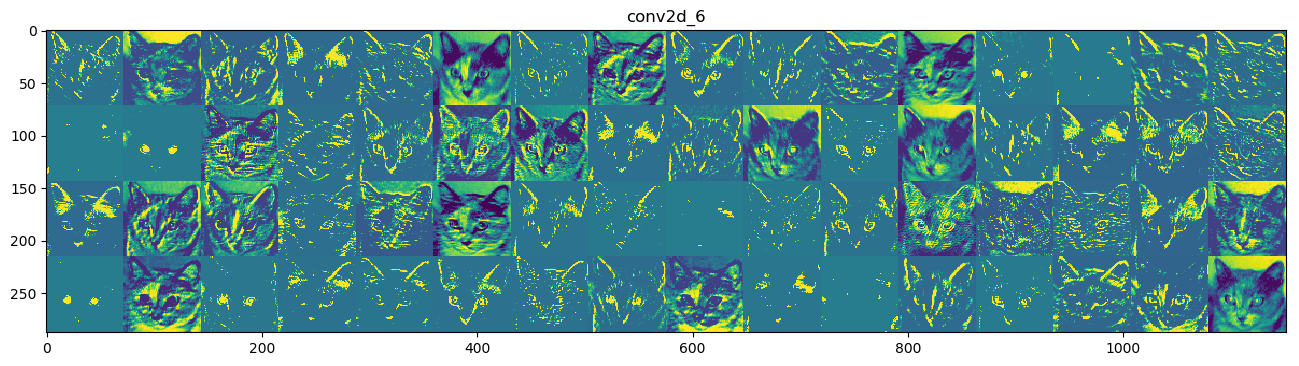

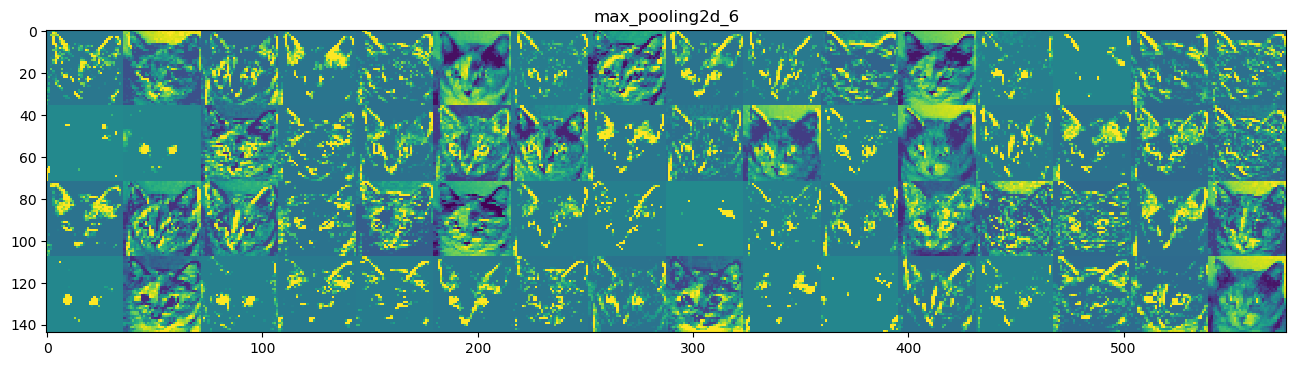

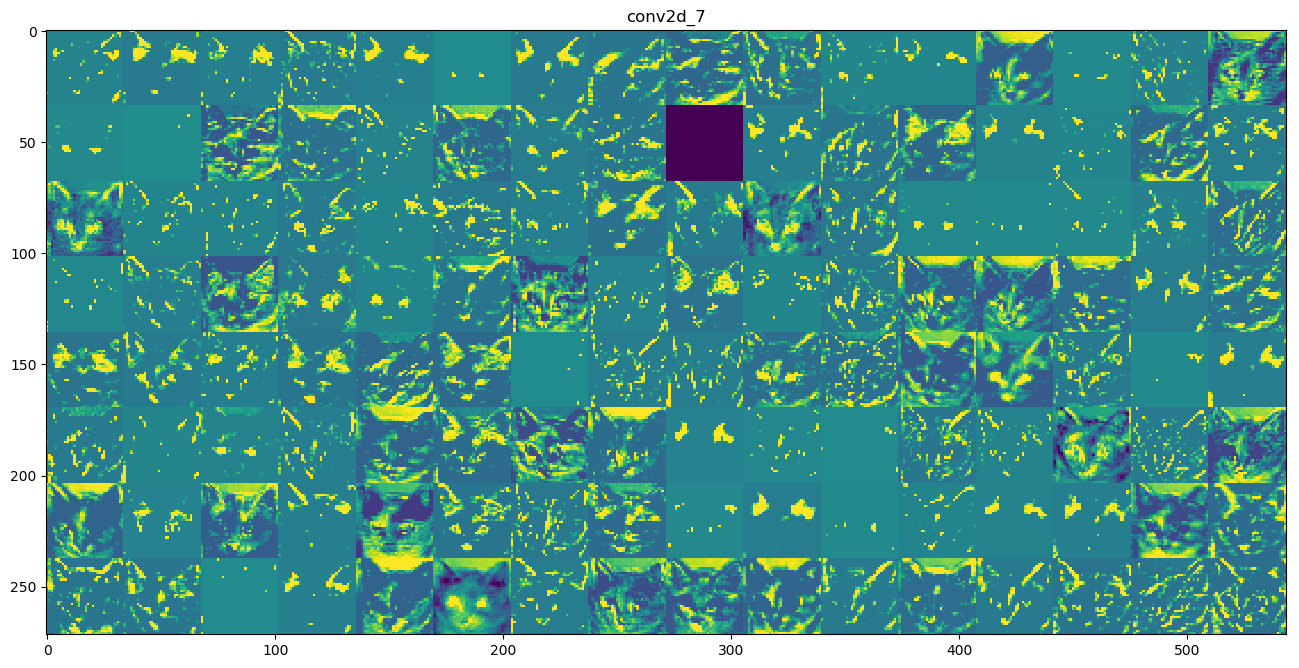

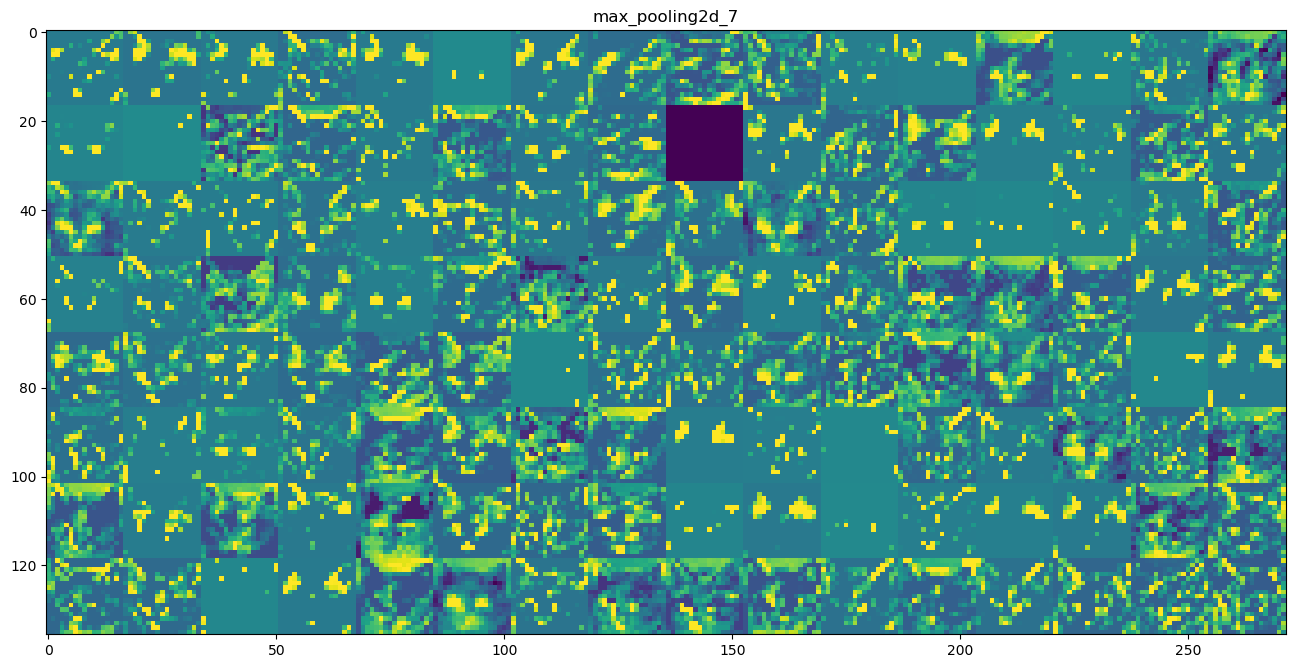

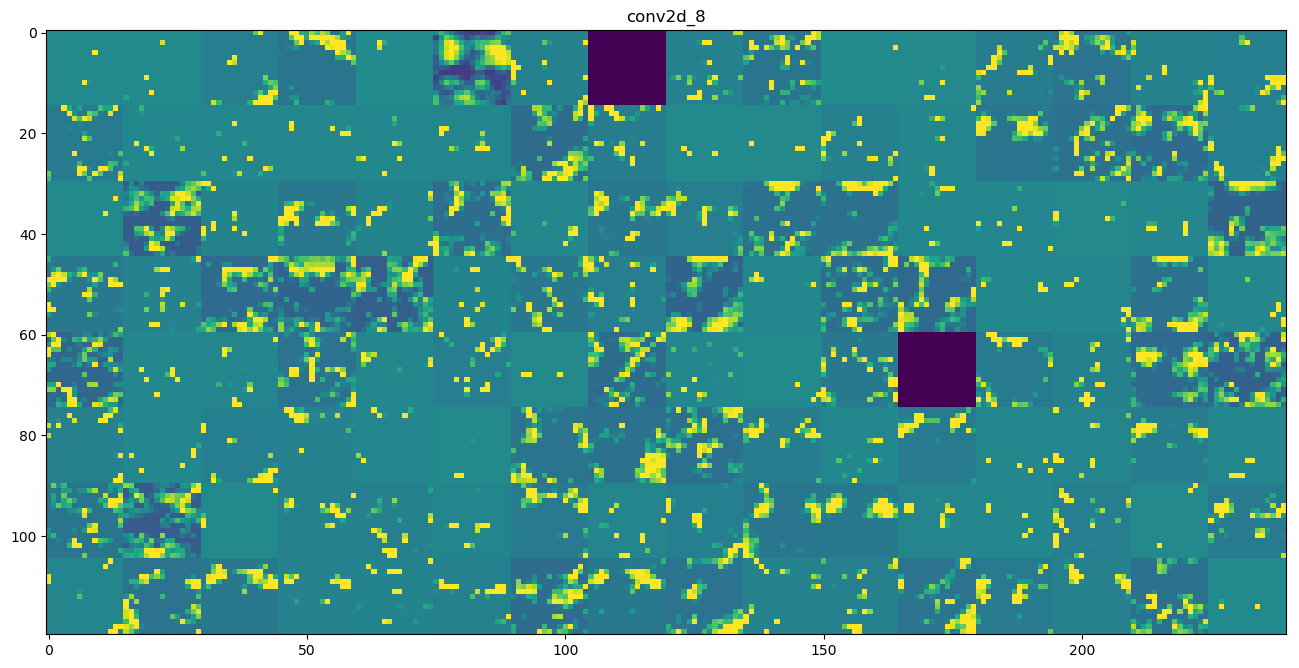

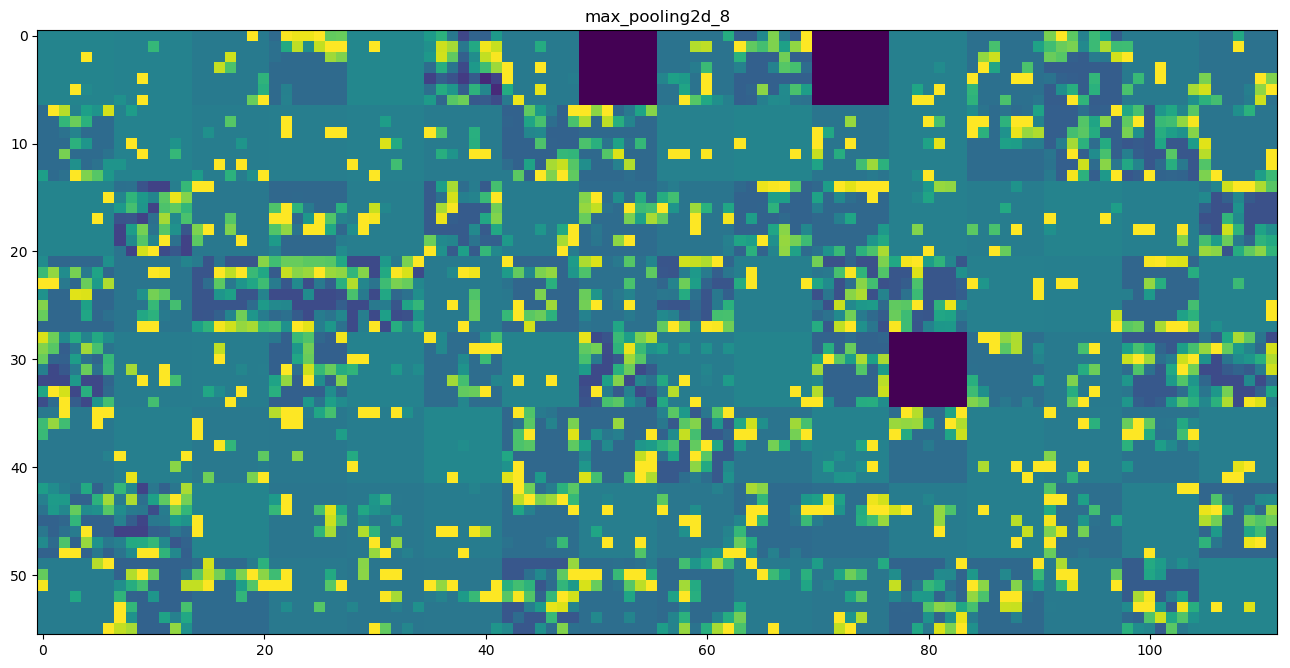

In [39]:
# Visualizing every channel in every intermediate activation
layer_names = []
# names of the layers, so we can have them as part of the plot
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    # number of features in the feature map
    n_features = layer_activation.shape[-1]
    # the feature mape has shape (l, size, size, n_features)
    size = layer_activation.shape[1]
    # tiles the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    # tiles each filter into a big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:, col*images_per_row + row]
            # post-processes the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            # displays the grid
            display_grid[col * size : (col+1) * size,
                         row * size : (row+1) * size] = channel_image
    
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')